# SpatialDE tutorial

## 1. Dev: read
### 1.2 stlearn.read.10x_mtx

In [1]:
import stlearn as st
import pandas as pd

C:\Users\uqjxu8\AppData\Local\Continuum\anaconda3\envs\stlearn2\lib\site-packages\anndata\core\anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
C:\Users\uqjxu8\AppData\Local\Continuum\anaconda3\envs\stlearn2\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
data = st.read.file_10x_mtx("C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Mouse_Brain_Section_Coronal\\filtered_feature_bc_matrix")
data.var_names_make_unique()

## 2. Add images and coordinates

In [10]:
st.add.positions(data,position_filepath = "C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Mouse_Brain_Section_Coronal\\spatial\\tissue_positions_list.csv",
                        scale_filepath = "C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Mouse_Brain_Section_Coronal\\spatial\\scalefactors_json.json",
                        quality = "low")


Trying to set attribute `.obs` of view, making a copy.


In [14]:
st.add.image(data, imgpath="C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Mouse_Brain_Section_Coronal\\spatial\\tissue_lowres_image.png")

Added tissue image to the object!


## 3 Dev: preprocessing

### 3.1. filter, normalize, scale & PCA

In [16]:
st.pp.filter_genes(data,min_cells=0.01*data.n_vars)
st.pp.normalize_total(data)
data.obsm['normalized'] = pd.DataFrame(data.X.toarray(), index=data.obs_names, columns=data.var_names)

filtered out 20012 genes that are detected in less than 310.53000000000003 cells
normalizing counts per cell
Normalization step is finished in adata.X


### 3.2 SpatialDE

In [17]:
st.tl.SpatialDE(data, use_data='normalized', top_genes=10)


SpatialDE results stored in adata.uns['SpatialDE_results'] and adata.uns['SpatialDE_top_genes']


#### Plot top spatially differential expressing genes

Populating the interactive namespace from numpy and matplotlib

Pak6:


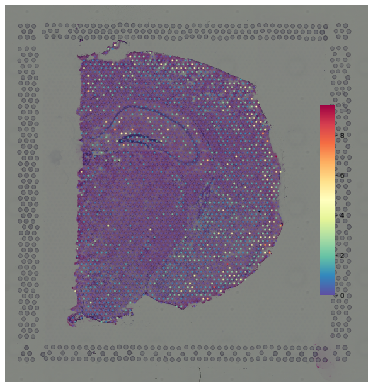


Fam189a1:


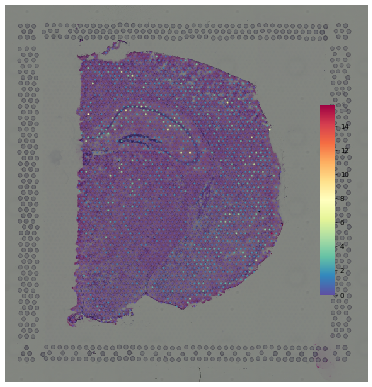


3110035E14Rik:


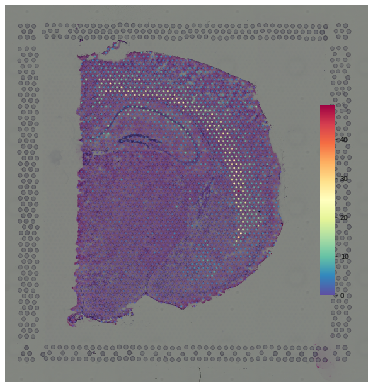


Kctd1:


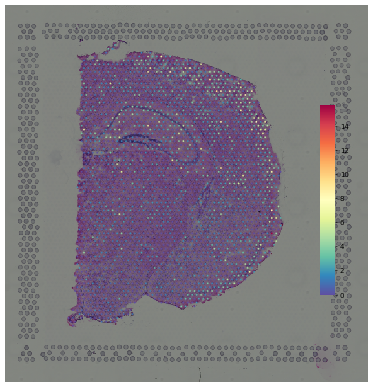


Actr2:


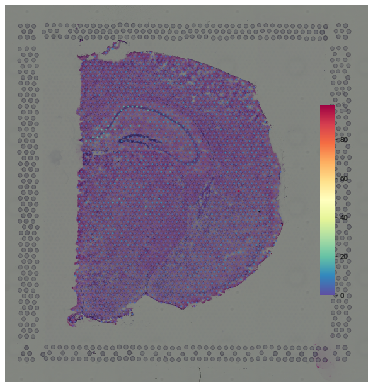


Cntnap1:


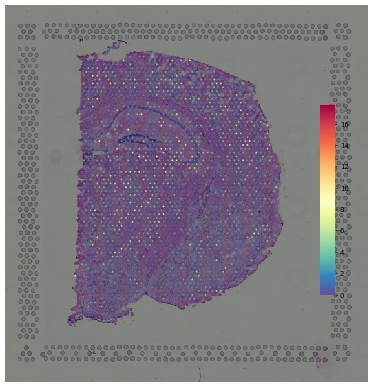


Egr4:


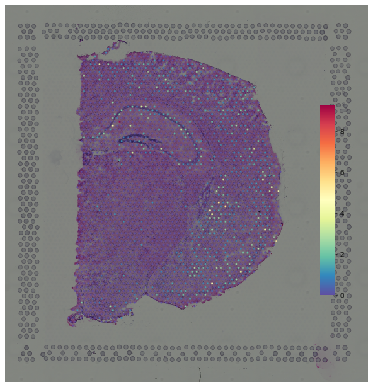


Hapln4:


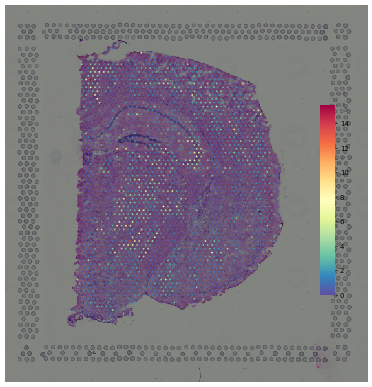


Atp1b3:


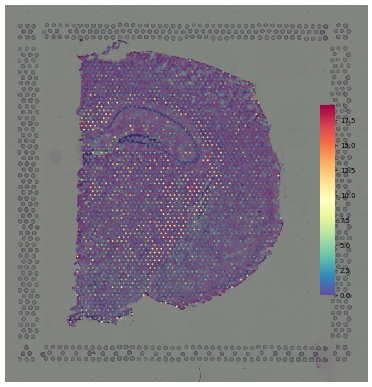


Usp54:


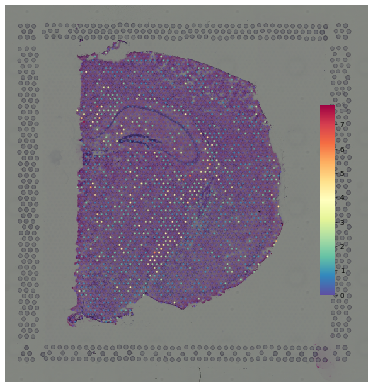

In [32]:
%pylab inline
figsize(10, 10)
for i, g in enumerate(data.uns['SpatialDE_top_genes']):
    print('\n'+data.uns['SpatialDE_top_genes'][i]+':')
    st.pl.gene_plot(data, genes=data.uns['SpatialDE_top_genes'][i], title=data.uns['SpatialDE_top_genes'][i], dpi=50)

#### assuming 5 different patterns and iterate till ELBO converges
#### (Careful! This step could take very long time)

In [ ]:
st.tl.microenv.spatial_patterns(data, data.uns['SpatialDE_results'], C=3)

C:\Users\uqjxu8\GIH\Github\stLearn\stlearn\tools\microenv\SpatialDE\base.py:45: RuntimeWarning: divide by zero encountered in true_divide
  return np.exp(-R2 / (2 * l ** 2))


#### Plot all spatial expression patterns with genes in each pattern

In [ ]:
figsize(20, 3)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    st.pl.gene_plot(data, genes=data.uns['pattern_'+str(i)], method="CumSum")

In [ ]:
for i in range(5):
    print('Pattern {}'.format(i))
    print(data.uns['pattern_' + str(i)])
    print()